<a href="https://colab.research.google.com/github/brunarigo/DS-project01-datasus-analysis/blob/main/Notebooks/Project01_Datasus_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Primeiras Análises

Primeiro, serão importados os arquivos que foram extraídos do DATASUS.
Para esse projeto foram realizadas 2 exportações de dados para análise, sendo elas:

1.   Dados Consolidados AHI (RD), por local de Internação
2.   Dados Consolidados AIH (RD), por local de Residência

Os filtros utilizados para as extrações foram:

*   Período Janeiro 2020 - Março 2021
*   Ano/Mês Atendimento
*   Valor Total
*   Municípios do ABC Paulista
*   Caráter Atedimento - Urgência

Após extraídos os arquivos, iniciei as análises dos dados. Existiam algumas informações faltantes como exemplo o munícípio de Rio Grande da Serra, que somente apresenta dados computados por Local de Internação e não foi possível realizar o comparativo com o Local de Residência por não termos esses registros.
Para esses casos onde as informações foram insuficientes para levantarmos hipóteses consistentes, elas serão descartadas.









In [23]:
import pandas as pd

In [24]:
URL1 = 'https://raw.githubusercontent.com/brunarigo/DS-project01-datasus-analysis/main/Data/A170947189_28_143_208_ABCLocInt.csv'
URL2 = 'https://raw.githubusercontent.com/brunarigo/DS-project01-datasus-analysis/main/Data/A171230189_28_143_208_ABCLocRes.csv'

In [25]:
#Importando Local Internação - Cidades Grande ABC - SP
dados_local_internacao = pd.read_csv(URL1, encoding='ISO-8859-1', sep=";", thousands=".", decimal=",")
dados_local_internacao.head()

,Município,2019/Fev,2019/Mar,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,351380 Diadema,-,-,-,-,-,"73082,85","239080,55","408775,57",629417.24,1375267.27,1570495.95,1542875.88,1386763.10,1682137.18,1878451.44,1815014.97,1834976.08,1592558.79,1580736.25,1675516.76,1655843.60,1546726.06,1414870.04,1069797.10,"449430,36",25421817.04
1,352940 Mauá,-,-,-,-,-,-,-,"543,79",298461.27,750717.25,1141079.99,1043326.36,986994.48,948350.46,1198249.67,1359856.37,1212006.66,1241777.45,1261243.21,1513813.72,1270365.08,1147436.34,1135371.21,1004413.59,"359050,66",17873057.56
2,354330 Ribeirão Pires,-,-,-,-,-,-,-,"958,66",28837.10,76958.29,81214.02,75340.08,84030.75,81924.52,204943.35,182898.53,173233.49,151949.66,153919.21,159487.91,173234.40,184018.52,215306.03,217136.51,"112182,93",2357573.96
3,354780 Santo André,"3330,83","3294,57","3466,49","3628,35","12926,40","40284,33","14329,29","115159,33",626889.33,1813657.86,2904044.52,2579566.57,2716686.93,2802996.49,4310978.08,4117297.68,4314444.24,4037697.65,3682132.31,4009177.05,4421552.55,4818207.31,2210176.85,1053053.71,"624085,28",51239064.00
4,354870 São Bernardo do Campo,-,-,-,-,"50095,36","46628,94","11470,95","13818,66",449909.36,2510648.59,3603566.75,3492608.04,3573512.21,4728146.62,5454918.66,5392551.39,5471503.41,5499147.01,6862261.02,6507471.14,7428421.06,9029122.08,9289677.45,8271066.85,"4950623,34",92637168.89


In [26]:
#Importando Local de Residência - Cidades Grande ABC - SP
dados_local_residencia = pd.read_csv(URL2, encoding='ISO-8859-1', sep=";", thousands=".", decimal=",")
dados_local_residencia.head()

,Município,2019/Mar,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,351380 Diadema,-,-,-,-,"66782,94","145717,45","340377,73",577788.39,1388154.13,1625685.56,1620262.59,1357307.38,1883251.89,2409991.72,2437493.71,2232783.85,1994629.12,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41,845460.97,30465815.86
1,352940 Mauá,-,-,-,-,-,"71073,01","75017,10",296275.18,931236.26,1294407.11,1353246.49,1320790.70,1284858.71,1509101.96,2302023.72,2209283.88,1588775.24,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17,529343.37,25641080.49
2,354330 Ribeirão Pires,-,-,-,-,-,-,"54683,92",66550.69,242654.05,302321.32,295898.24,280818.83,340946.84,320788.23,350160.63,309085.09,458820.39,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31,209522.10,5409082.01
3,354410 Rio Grande da Serra,-,-,-,-,-,-,-,45490.48,120333.08,122621.17,70815.71,88454.02,65124.62,136490.96,177072.90,177360.80,160545.84,227311.99,98170.07,100566.23,183346.75,126089.90,158703.38,42324.35,2100822.25
4,354780 Santo André,"3294,57","3466,49","3628,35","12926,40","40284,33","10958,00","199533,26",861694.32,1869242.66,3453461.25,2807859.71,3000264.56,3038084.42,4246626.42,4412251.79,4797647.57,4448518.05,3832744.49,4452298.97,4657632.56,5308546.65,2625892.17,1490003.84,896510.90,56473371.73


In [27]:
#Inicio tratamento dados Local de Internação: Setando Index, excluindo totais
colunas_com_valores = dados_local_internacao.mean().index.tolist()
colunas_com_valores.insert(0,"Município")
dados_local_internacao = dados_local_internacao[colunas_com_valores]
dados_local_internacao = dados_local_internacao.set_index("Município")
dados_local_internacao = dados_local_internacao.drop("Total", axis=1)
dados_local_internacao = dados_local_internacao.T
dados_local_internacao = dados_local_internacao.drop("Total", axis=1)

In [28]:
#Selecionando período interessante para análise - ultimos 6 meses de dados consistentes
periodo_local_internacao = dados_local_internacao.T
periodo_local_internacao = periodo_local_internacao[["2020/Set","2020/Out","2020/Nov","2020/Dez","2021/Jan","2021/Fev"]]

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

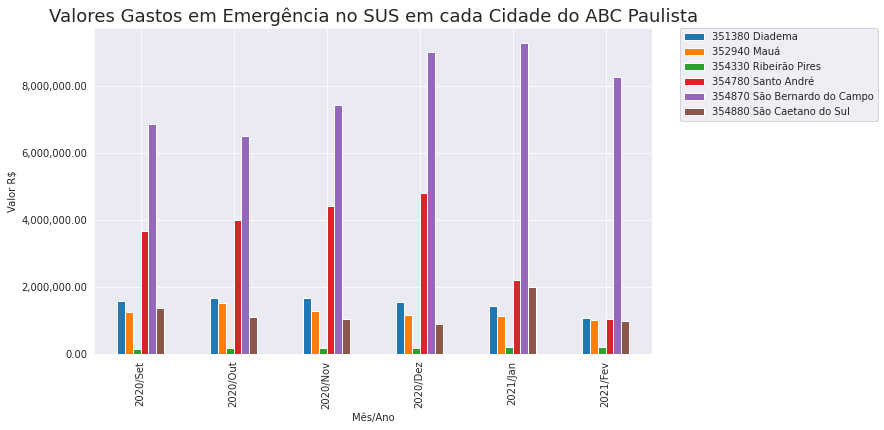

In [30]:
ax = periodo_local_internacao.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Valores Gastos em Emergência no SUS em cada Cidade do ABC Paulista", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#Valores Gastos em Emergência no SUS em cada cidade do ABC Paulista
Este Gráfico apresenta os gastos com Emergência em cada cidade.

Neste gráfico é possível observamos que houve uma crescente considerável nos gastos, iniciando no mês de Novembro/20 e tendo uma possível queda somente em Fevereiro/21. 

A princípio, essa possivel queda será desconsiderada pois não temos como evidenciarmos se todos os dados de Fevereiro/21 foram computados até o momento da extração para essse estudo, levando em consideração que esse estudo foi realizado em Maio/21 e ainda estamos com um grande pico de atendimentos de COVID-19 na região.

O que é interessante aqui é focarmos nos meses em que se iniciou o pico.

Para as maiores cidades, **São Bernardo do Campo** e **Santo André**, houve um aumento muito claro de ser identificado.

Porém, para as cidades menores, como **Diadema** e **Mauá**, é possível observar que os durante os mesmos meses, os gastos se mantiveram sem aumento e, arrisco dizer que pode até ter ocorrido uma pequena baixa. Vamos estudar melhor esse ponto nas próximas análises.

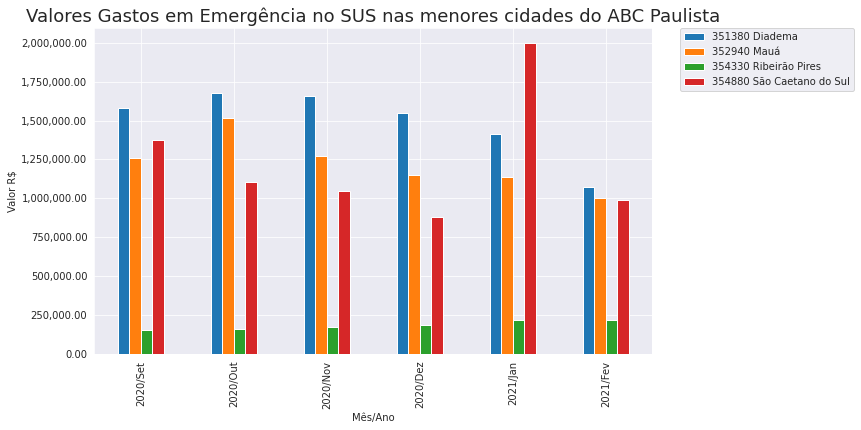

In [31]:
#Selecionando Municipios de Locais de Internaçao das cidades menores do Grande ABC
municipios_int_menor_gasto = periodo_local_internacao.loc[["351380 Diadema","352940 Mauá","354330 Ribeirão Pires", "354880 São Caetano do Sul"]]

ax = municipios_int_menor_gasto.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Valores Gastos em Emergência no SUS nas menores cidades do ABC Paulista", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#Valores Gastos em Emergência no SUS nas menores cidades do ABC Paulista

Neste gráfico é apresentada a análise somente dos municípios que tiveram os menores gastos.

Enquanto tivemos um aumento considerável nos gastos para os municípios com maior quantidade de habitantes (São Bernardo do Campo e Santo André) durante o pico de casos da Covid, nos meses de Outubro, Novembro, Dezembro e Janeiro houve uma queda nos gastos para os municipios de menos habitantes.

Veja o caso de Diadema e Mauá, representadas em azul e laranja respectivamente.

Fica claro a queda dos gastos, o que não é justificável levando em consideração que o esperado no mesmo período seria um grande aumento ou, no máximo, uma estabilidade dos gastos levando em consideração que a cidade pode ter chegado ao seu teto de atendimentos possiveis e lotação dos hospitais.

Já para a cidade de São Caetano do Sul, representada em vermelho no gráfico, apos uma pequena queda houve novo aumento nos gastos, o que é aceitável levando em consideração o aumento dos casos de COVID durante o pico em Janeiro.

In [32]:
#Realizando os mesmos processos, porém agora com os gastos considerando a cidade de Residência do paciente e não mais a cidade em que ele foi atendido
#Inicio tratamento dados com gastos no Local de Residência: Setando Index, excluindo totais
colunas_com_valores = dados_local_residencia.mean().index.tolist()
colunas_com_valores.insert(0,"Município")
dados_local_residencia = dados_local_residencia[colunas_com_valores]
dados_local_residencia = dados_local_residencia.set_index("Município")
dados_local_residencia = dados_local_residencia.drop("Total", axis=1)

In [33]:
#Excluindo dados referente ao Munícipio de Rio Grande da Serra. Não existem dados computados desse municipio para a primeira situação (Local de Internação), ele será desconsiderado na análise
dados_local_residencia = dados_local_residencia.T
dados_local_residencia = dados_local_residencia.drop("354410 Rio Grande da Serra", axis=1)

In [34]:
dados_local_residencia = dados_local_residencia.drop("Total", axis=1)

In [35]:
#Selecionando período interessante para análise - ultimos 6 meses de dados consistentes
periodo_local_residencia = dados_local_residencia.T
periodo_local_residencia = periodo_local_residencia[["2020/Set","2020/Out","2020/Nov","2020/Dez","2021/Jan","2021/Fev"]]
periodo_local_residencia

,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Município,,,,,,
351380 Diadema,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41
352940 Mauá,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17
354330 Ribeirão Pires,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31
354780 Santo André,3832744.49,4452298.97,4657632.56,5308546.65,2625892.17,1490003.84
354870 São Bernardo do Campo,6878981.32,5949298.76,6441422.46,7224034.17,7809197.19,6865300.08
354880 São Caetano do Sul,1478988.31,1152776.87,1008496.26,910254.29,1953033.32,1081890.08


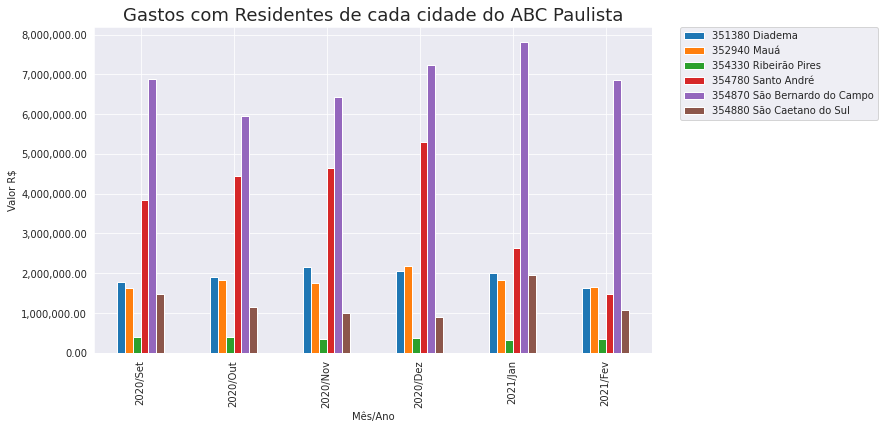

In [36]:
ax = periodo_local_residencia.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Gastos com Residentes de cada cidade do ABC Paulista", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#Gastos com Residentes de cada cidade do ABC Paulista

Para entendermos melhor o cenário, iremos analisar durante o mesmo período e para as mesmas cidades, os gastos porém agora com os Residentes, independente da cidade em que foi realizado o atendimento.

Para exemplificarmos melhor a situação, imagine um habitante de Diadema sendo atendido na cidade de São Bernardo do Campo. Esse gráfico irá apresentar os gastos com todos os habitantes de determinada cidade, independente de onde foi realizado o atendimento.

Para as maiores cidades, temos o mesmo cenário apresentado anteriormente. Uma crescente considerável nos meses de pico.

Porém, para as menores cidades, o cenário é o oposto. Diferente dos primeiros graficos que mostravam Diadema e Mauá com uma queda, aqui é possivel observar um aumento, queda e aumento. Vamos entender melhor essa situação nas próximas análises.

In [37]:
#Selecionando Municipios de Locais de Residência com Menores Gastos
municipios_res_menor_gasto = periodo_local_residencia.loc[["351380 Diadema","352940 Mauá","354330 Ribeirão Pires", "354880 São Caetano do Sul"]]
municipios_res_menor_gasto

,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Município,,,,,,
351380 Diadema,1775210.23,1901317.90,2164084.77,2054346.70,2017072.42,1628096.41
352940 Mauá,1623600.90,1823194.15,1754046.47,2181236.29,1829344.78,1664225.17
354330 Ribeirão Pires,406025.93,392225.85,350818.91,377184.07,314220.61,336356.31
354880 São Caetano do Sul,1478988.31,1152776.87,1008496.26,910254.29,1953033.32,1081890.08


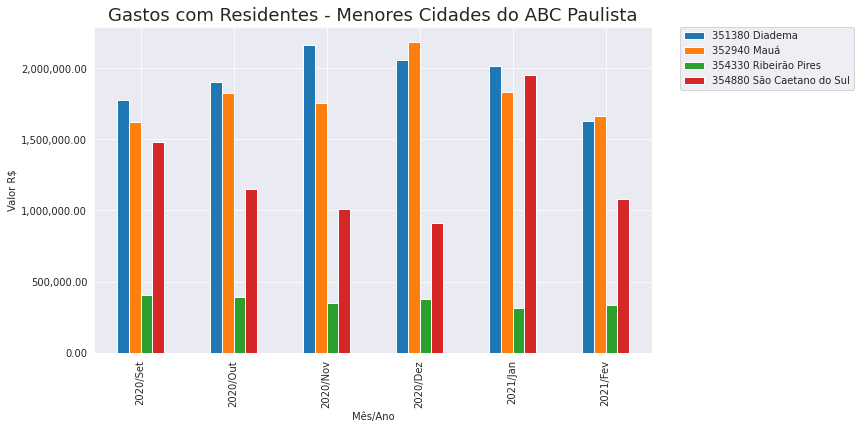

In [38]:
ax = municipios_res_menor_gasto.T.plot(kind='bar',figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
sns.set_style('darkgrid')
plt.xlabel("Mês/Ano")
plt.ylabel("Valor R$")
plt.title("Gastos com Residentes - Menores Cidades do ABC Paulista", fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#Gastos com Residentes - Menores Cidades do ABC Paulista

Neste gráfico são apresentados os gastos com residentes das menores cidades do ABC Paulista.

É possivel evidenciar um cenário bem diferente dos gastos em cada cidade. Veja por exemplo Mauá, representado em laranja, que teve seu pico de gasto em Dezembro. Bem diferente dos gastos com atendimentos em Mauá, representado nos gráficos anteriores, que teve em dezembro uma de suas maiores baixas.

Agora vamos entender o cenário de cada cidade, comparando os valores gastos na cidade e os valores gastos com os seus habitantes.


#Análise para cada Cidade do ABC Paulista

In [50]:
#Extraindo dados de cada cidade dos dataframes principais
res_diadema = municipios_res_menor_gasto.T
res_diadema = res_diadema['351380 Diadema']
int_diadema = municipios_int_menor_gasto.T
int_diadema = int_diadema['351380 Diadema']

res_maua = municipios_res_menor_gasto.T
res_maua = res_maua['352940 Mauá']
int_maua = municipios_int_menor_gasto.T
int_maua = int_maua['352940 Mauá']

res_ribeirao = municipios_res_menor_gasto.T
res_ribeirao = res_ribeirao['354330 Ribeirão Pires']
int_ribeirao = municipios_int_menor_gasto.T
int_ribeirao = int_ribeirao['354330 Ribeirão Pires']

res_scs = municipios_res_menor_gasto.T
res_scs = res_scs['354880 São Caetano do Sul']
int_scs = municipios_int_menor_gasto.T
int_scs = int_scs['354880 São Caetano do Sul']

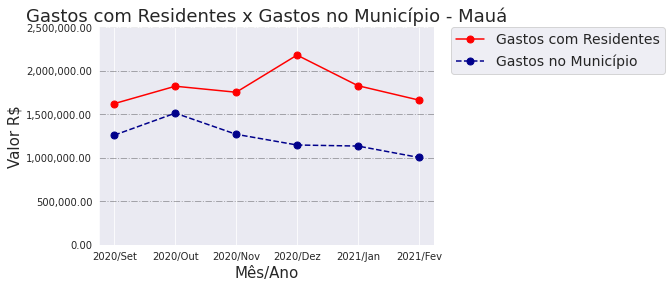

<Figure size 720x432 with 0 Axes>

In [44]:
plt.plot(res_maua, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_maua.T, color='darkblue',linestyle='--', marker='o', markersize = 7)
plt.ylim(0,2500000.00)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - Mauá', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()


##Gastos com Residentes x Gastos no Município - Mauá

Nesse gráfico fica evidenciado que durante todo o período, os gastos foram maiores com os seus residentes do que dentro da cidade. Ou seja, pacientes de Mauá foram muito mais atendidos em cidades vizinhas do que dentro da cidade.

Além disso, durante o pico de Dezembro, houve um grande aumento nos gastos com residentes, enquanto houve uma queda dos gastos dentro da cidade. Os gastos com habitantes no total foram quase que o dobro do que os gastos dentro da cidade.

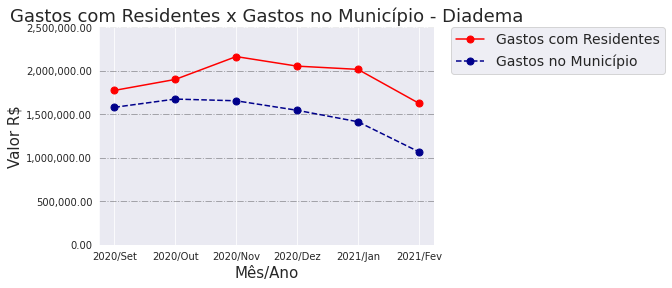

<Figure size 720x432 with 0 Axes>

In [45]:
plt.plot(res_diadema, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_diadema.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,2500000.00)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - Diadema', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()

##Gastos com Residentes x Gastos no Município - Diadema

Nesse gráfico fica evidenciado que durante todo o período, os gastos foram maiores com os seus residentes do que dentro da cidade. 

Ou seja, assim como Mauá, habitantes de Diadema foram muito mais atendidos em cidades vizinhas do que dentro da cidade.

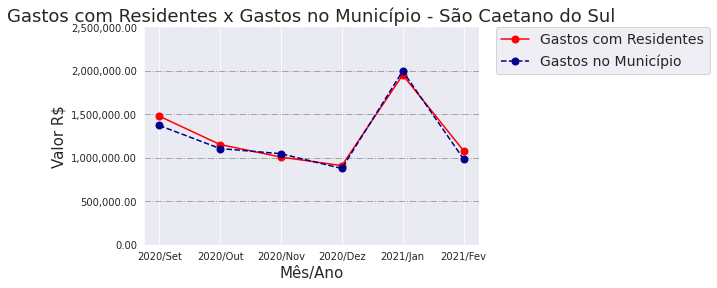

<Figure size 720x432 with 0 Axes>

In [46]:
plt.plot(res_scs, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_scs.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,2500000.00)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - São Caetano do Sul', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()

##Gastos com Residentes x Gastos no Município - São Caetano do Sul

Em São Caetano do Sul, encontramos um cenário muito diferente das outras cidades analisadas.

Além de não ter uma grande diferença entre Gastos com Residentes x Gastos no Município (salvo uma pequena diferença em Setembro), a maior parte do período analisado ambos os gastos andaram juntos inclusive no pico, em Janeiro.

Talvez possamos dizer que esse seja um dos cenários mais saudaveis, em que a cidade deu conta dos gastos e que, no geral, todo os gastos foram direcionados aos seus habitantes. Até no pico, a cidade esteve preparada para atender aos seus habitantes.

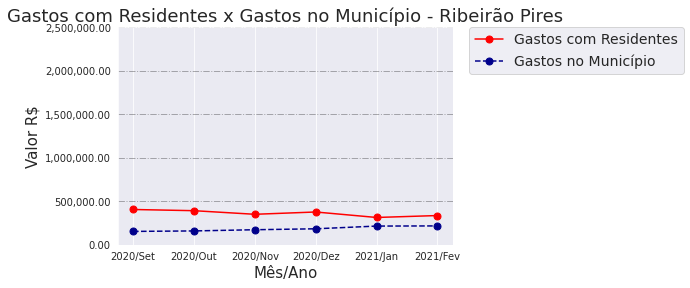

<Figure size 720x432 with 0 Axes>

In [47]:
plt.plot(res_ribeirao, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_ribeirao.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,2500000.00)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - Ribeirão Pires', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()

##Gastos com Residentes x Gastos no Município - Ribeirão Pires

Apesar de não termos picos de gasto em Ribeirão Pires, os gastos foram maiores com os seus residentes do que dentro da cidade assim como Mauá e Diadema. 

A questão de não haver um pico mesmo nos meses mais críticos da COVID talvez levante a possibilidade de que os atendimentos e gastos se mantiveram estáveis durante todo o período. Talvez um maior controle de contágio, ou uma melhor campanha da COVID? É uma situação interessante para ser analisada. Porque não houve pico de atendimento, nem em questão de atendimento, nem em questão de habitantes para essa cidade?



In [42]:
res_sbc = periodo_local_residencia.T
res_sbc = res_sbc['354870 São Bernardo do Campo']
int_sbc = periodo_local_internacao.T
int_sbc = int_sbc['354870 São Bernardo do Campo']

res_sa = periodo_local_residencia.T
res_sa = res_sa['354780 Santo André']
int_sa = periodo_local_internacao.T
int_sa = int_sa['354780 Santo André']

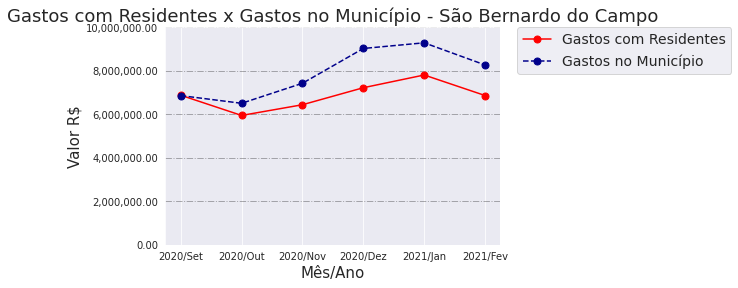

<Figure size 720x432 with 0 Axes>

In [48]:
plt.plot(res_sbc, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_sbc.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,10000000)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - São Bernardo do Campo', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()

##Gastos com Residentes x Gastos no Município - São Bernardo do Campo

Diferente de todas as outras cidades, São Bernardo do Campo apresenta um cenário interessante.

Nessa cidade, que começou o período com os gastos equivalentes, a partir de Setembro começou a ter um gasto muito maior com atendimentos do que com os seus residentes.

Levando em consideração que essa cidade é uma das maiores do ABC Paulista, vale observar aqui que estamos com uma escala maior no gráfico na questão de valores, chegando quase ao teto de 10.000.000,00 reais.


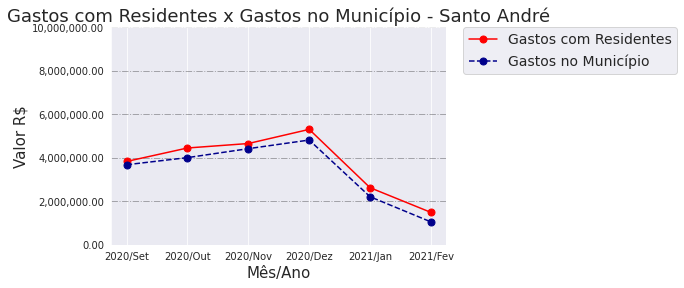

<Figure size 720x432 with 0 Axes>

In [49]:
plt.plot(res_sa, color='red', linestyle='-', marker='o', markersize = 7)
plt.plot(int_sa.T, color='darkblue', linestyle='--', marker='o', markersize = 7)
plt.ylim(0,10000000)
plt.xlabel('Mês/Ano', fontsize=15)
plt.ylabel('Valor R$', fontsize=15)
plt.title('Gastos com Residentes x Gastos no Município - Santo André', fontsize=18)
axes = plt.gca()
axes.yaxis.grid(b=True, color='black', alpha=0.3, linestyle='-.', linewidth=1)
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(['Gastos com Residentes','Gastos no Município'], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure(figsize=(10, 6))
plt.show()

##Gastos com Residentes x Gastos no Município - Santo André

Em Santo André encontramos um cenário bem parecido com o cenário de São Caetano do Sul.

A maior parte do período analisado ambos os gastos andaram juntos, porém houve uma diferença (pequena, se comparado a outras cidades) de gastos com residentes e gastos no munícipio, se mantendo maior os gastos com residentes. O que nos leva a crer que, mesmo que pouco, ainda assim habitantes saem de Santo André para serem atendidos em cidades vizinhas.



#Conclusões

Após a análise, é possivel concluir que:

- Os habitantes das menores cidades, por determinado período e por diversas situações (que não serão exploradas aqui), estão deixando os hospitais da sua cidade para irem em busca de atendimento nas cidades vizinhas. 

- Não é possivel dizer que os gastos em cada cidade corresponda ao que de fato seja a capacidade de atendimento da cidade, ou ao que de fato seja necessário em questão de valores para manter a cidade, levando em consideração que os habitantes estão sendo atendidos em outras cidades.

- Podem existir cidades que acabam relacionando os gastos além do que seria necessário, pois está atendendo a habitantes das cidades vizinhas, o que distorce o gasto real com aquela cidade.

- A cidade de São Caetano do Sul apresentou o melhor cenário, em que na maior parte do tempo Gastos com Residentes e Gastos no Município andaram juntos. O que São Caetano do Sul está realizando e adotando na area da saúde pode ser usado como modelo para as outras cidades?

- Os habitantes de Mauá foram os mais afetados, seguidos de Diadema. Para esses casos, além da cidade não conseguir controlar e atender à sua população, os seus habitantes acabam tendo maiores prejuízos por precisarem se deslocar e ir em busca de atendimento urgente em cidades vizinhas, onde dependendo da situação, além do gasto com o deslocamento, cada minuto pode contar.

- São Bernardo do Campo foi a única cidade que gastou mais com atendimentos do que com residentes. Talvez seja a cidade mais procurada para atendimento pelos habitantes de outras cidades? É um ponto interessante a se pensar. Qual seria o motivo disso? Fácil acesso, bom atendimento? Hospitais de Campanha? São ponto que precisam ser estudados e entendidos a fundo.



# Considerações Finais

Muitas hipóteses foram levantadas nesse estudo. Não podemos afirmar com certeza de que todas estão corretas sem análises complementares que vão além desses dados. Acredito que esse possa ser somente o começo de um caminho que precisa ser percorrido.


Porém, o mais importante é levantarmos essas hipóteses e criar a oportunidade de debate. É preciso entender que, com a análise do que já temos no presente podemos prever, mudar e melhorar o futuro.